<a href="https://colab.research.google.com/github/kritika312/Machine-Learning-CSE4020/blob/main/regression/ML_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kritika Aneja (19BCE1469)   LAB3 

### ***Exploring wheat seed dataset ***

##Attributes:
###1.Area.(area)
###2.Perimeter.(peri)
###3.Compactness (compact)
###4.Length of kernel.(LK)
###5.Width of kernel.(WK)
###6.Asymmetry coefficient.(ACO)
###7.Length of kernel groove.(LKG)
###8.Class (1, 2, 3).(clas)

In [ ]:
import pandas as pd

#df = pd.read_csv('seed.txt', header=None, sep='\s+')
df = pd.read_csv('./seed.txt', header=None, sep='\s+')
df.columns = ['area', 'peri', 'compact', 'LK', 
              'WK', 'ACO', 'LKG', 'clas']
df.head()

,area,peri,compact,LK,WK,ACO,LKG,clas
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


**Visualizing Characteristics of Dataset**

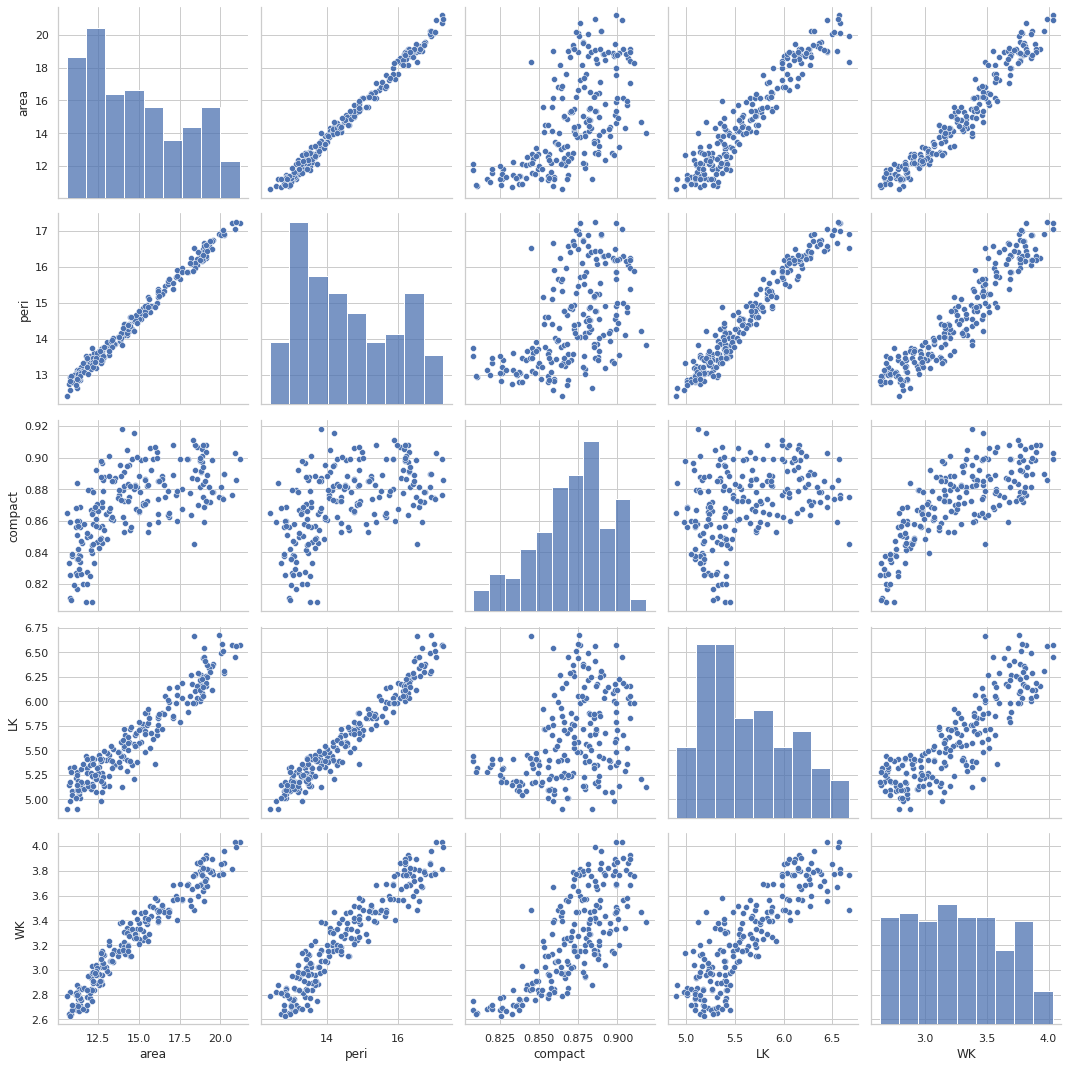

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', context='notebook')
cols = ['area', 'peri', 'compact', 'LK', 'WK']

sns.pairplot(df[cols], height=3)
plt.tight_layout()

plt.show()

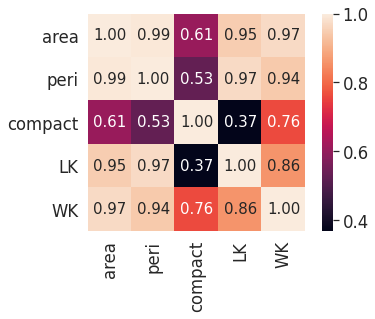

In [ ]:
import numpy as np


cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

**Estimating the coefficient of a regression model via scikit-learn**

***   taken 2 attributes *compactness* and *area*  ***

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[['area']].values
y = df['compact'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [ ]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.005
Intercept: 0.798


In [ ]:
y_pred

array([0.87303615, 0.871159  , 0.86824448, 0.86602155, 0.87738322,
       0.86868907, 0.87022043, 0.86735531, 0.87980375, 0.87886518,
       0.87303615, 0.86696012, 0.86626854, 0.86572516, 0.86552756,
       0.86972644, 0.86676253, 0.87516028, 0.87026982, 0.86048891,
       0.8676023 , 0.86735531, 0.87609886, 0.8573274 , 0.87180118,
       0.87763021, 0.86197086, 0.8605877 , 0.86735531, 0.864095  ,
       0.86266244, 0.87417231, 0.86725651, 0.86651553, 0.87199877,
       0.87728442, 0.87767961, 0.88202669, 0.87076381, 0.86819508,
       0.86453959, 0.864342  , 0.86266244, 0.87422171, 0.87229517,
       0.86582395, 0.87353013, 0.87170238, 0.87071441, 0.8710602 ,
       0.86893606, 0.87560487, 0.86923245, 0.86844208, 0.86938065,
       0.87189998, 0.86908426, 0.87135659, 0.87362893, 0.85747559,
       0.85406709, 0.85312852, 0.85871056, 0.86295884, 0.8607853 ,
       0.86127928, 0.86849148, 0.86686132, 0.86863967, 0.86053831,
       0.88474361, 0.88084112, 0.88291586, 0.8920546 , 0.88074

In [ ]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 

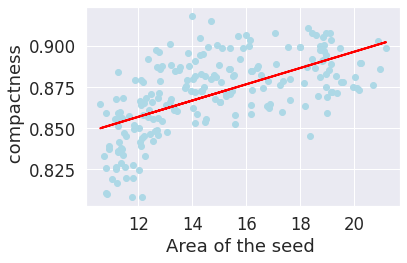

In [ ]:
lin_regplot(X, y, slr)
plt.xlabel('Area of the seed ')
plt.ylabel(' compactness')
plt.tight_layout()

plt.show()

**Evaluating the performance of linear regression models**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['compact'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

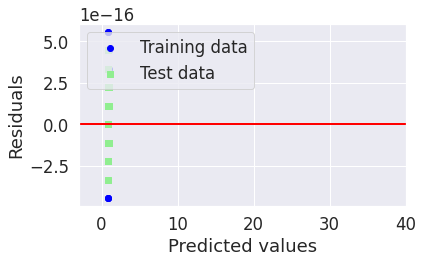

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-3, 40])
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.000, test: 0.000
R^2 train: 1.000, test: 1.000


**Using Regularized methods of Regression**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[ 0.13554846  0.         -0.          0.          0.          0.
  0.        ]


In [ ]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.018, test: 0.024
R^2 train: 0.911, test: 0.866


***taking other two attributes:   *perimeter* and *length of kernel* ***

In [ ]:
X = df[['peri']].values
y = df['LK'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [ ]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.330
Intercept: 0.825


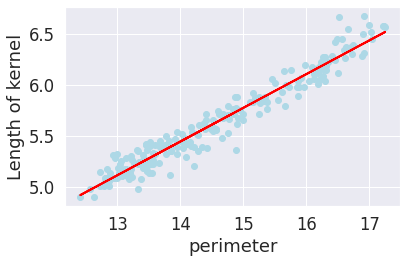

In [ ]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 

lin_regplot(X, y, slr)
plt.xlabel('perimeter')
plt.ylabel('Length of kernel')
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['LK'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

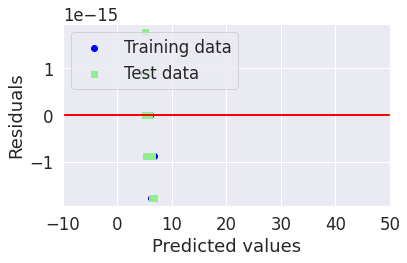

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.000, test: 0.000
R^2 train: 1.000, test: 1.000
